In [19]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits #Loading in the MNIST digits dataset

## SPLITTING THE DATASET

In [9]:
mnist = load_digits() #Loading the mnist dataset from sklearn
print(mnist.keys())#Printing the keys to the dictionary to find out the labels of columns 

n = len(mnist.images)
data = mnist.images.reshape((n, -1))#Reshaping the images from a 2D vector to a 1D vector

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, mnist.target,test_size = 0.35, random_state = 42)#Splitting the dataset into a 65/35 split

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


## APPLYING A KNN CLASSIFIER ON THE DATASET

In [7]:
from sklearn.neighbors import KNeighborsClassifier
near_neighbor = KNeighborsClassifier(n_neighbors = 10)# Setting the number of categories to 10
near_neighbor.fit(X_train, y_train)

#Fitting different models with different values of k to compare peformance
nearest = KNeighborsClassifier(n_neighbors = 5)#Setting the number to half of the recommended
nearest.fit(X_train, y_train)

neigh = KNeighborsClassifier(n_neighbors = 20)#Setting the number to twice the recommended
neigh.fit(X_train, y_train)

neighbor = KNeighborsClassifier(n_neighbors = 6)#Setting the number to twice the recommended
neighbor.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6)

### COMPARING PERFORMANCE OF KNN CLASSIFIERS

The accuracy score for a k = 10 KNN =0.9809220985691574


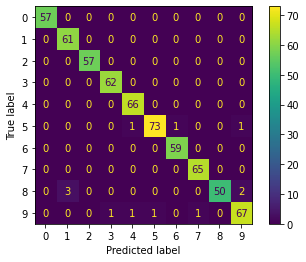

The accuracy score for a k = 5 KNN =0.9936406995230525


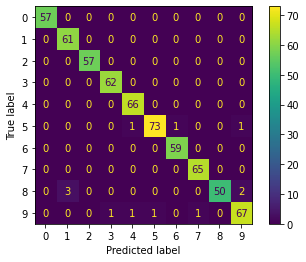

The accuracy score for a k = 20 KNN =0.9666136724960255


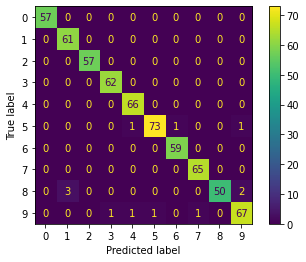

The accuracy score for a k = 6 KNN =0.9666136724960255


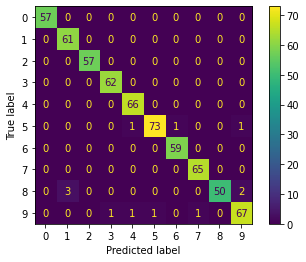

In [23]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

#Making predictions with the classifiers
near_neighbor_pred = near_neighbor.predict(X_test)
nearest_pred = nearest.predict(X_test)
neigh_pred = neigh.predict(X_test)
neighbor_pred = neigh.predict(X_test)

#Outputting the predictions
print(f'The accuracy score for a k = 10 KNN ={accuracy_score(y_test, near_neighbor_pred)}')
cm1 = confusion_matrix(y_test, near_neighbor_pred, labels = mnist.target_names)
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels = mnist.target_names)
disp1.plot()
plt.show()

print(f'The accuracy score for a k = 5 KNN ={accuracy_score(y_test, nearest_pred)}')
cm2 = confusion_matrix(y_test, nearest_pred, labels = mnist.target_names)
disp2 = ConfusionMatrixDisplay(confusion_matrix= cm1, display_labels = mnist.target_names)
disp2.plot()
plt.show()

print(f'The accuracy score for a k = 20 KNN ={accuracy_score(y_test, neigh_pred)}')
cm3 = confusion_matrix(y_test, neigh_pred, labels = mnist.target_names)
disp3 = ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels = mnist.target_names)
disp3.plot()
plt.show()

print(f'The accuracy score for a k = 6 KNN ={accuracy_score(y_test, neighbor_pred)}')
cm4 = confusion_matrix(y_test, neighbor_pred, labels = mnist.target_names)
disp4 = ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels = mnist.target_names)
disp4.plot()
plt.show()

## APPLYING AN SVM ON THE DATASET

In [25]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

#Fitting the model
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

### DETERMINING THE PERFORMANCE OF THE SVM

The accuracy score for the SVM =0.9825119236883942


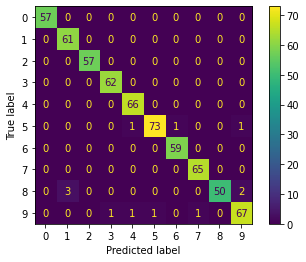

In [26]:
svm_pred = clf.predict(X_test)

print(f'The accuracy score for the SVM ={accuracy_score(y_test, svm_pred)}')
cm5 = confusion_matrix(y_test, svm_pred, labels = mnist.target_names)
disp5 = ConfusionMatrixDisplay(confusion_matrix=cm5, display_labels = mnist.target_names)
disp1.plot()
plt.show()